# Predicting Heart Disease Using Machine Learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning capable of predicting if somneone has a heart problem based on their heart medical atrributes:

We are going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



## 1. Problem Defination

Given clinicals parameters about patient, can we predict whether or not they have heart probelms


## 2. Data 
The data came from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


## 3. Evaluation

Objective: if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features

This is where you will get different information about each of the features of your data. 

**Create data Dictionary**

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Preparing the tools


In [5]:
#import all the tools we need

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline  

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [6]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape #rows and colums

(303, 14)

## Data Exploration (EDA)

The goal is to find out more about the data and become a subject matter expert on the dataset you are working with

1. What questions are you trying to solve?
2. What of kind of data do we have and how do we treat different types?
3. Whats missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of the data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
#How many class are there in the target
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

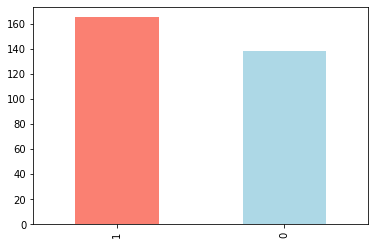

In [12]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Find Patterns for Further Exploration

**Heart Check Frequency according to Sex**

In [16]:
df.sex.value_counts() #male=1, 0=female

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


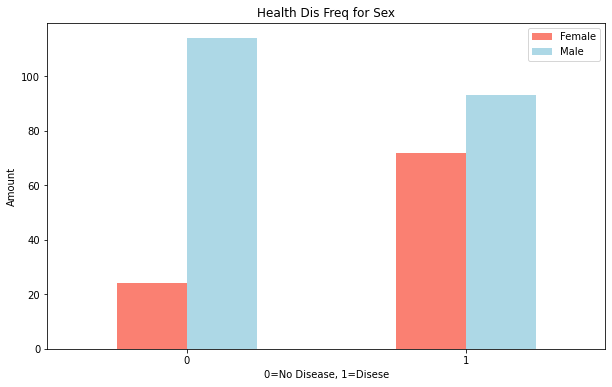

In [23]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Health Dis Freq for Sex")
plt.xlabel("0=No Disease, 1=Disese")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [24]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

 ### Age va Max Heart Rate and Target

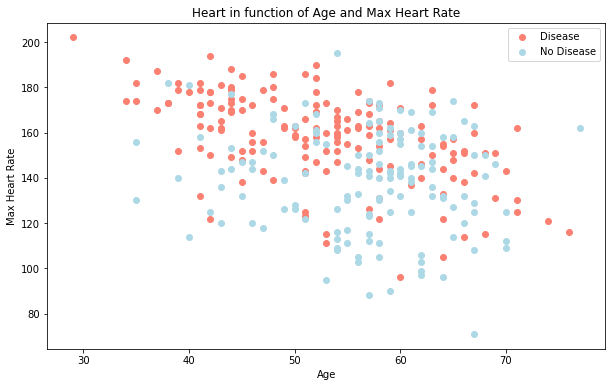

In [33]:
#Create another figure
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon"
           )

#scatter with positive examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#Add some helpful info
plt.title('Heart in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

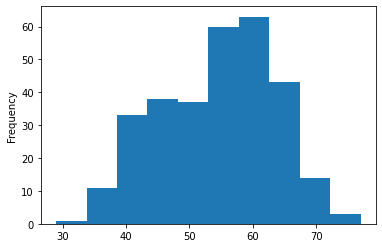

In [34]:
#Check the distribution of the age column with an histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Test

In [36]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


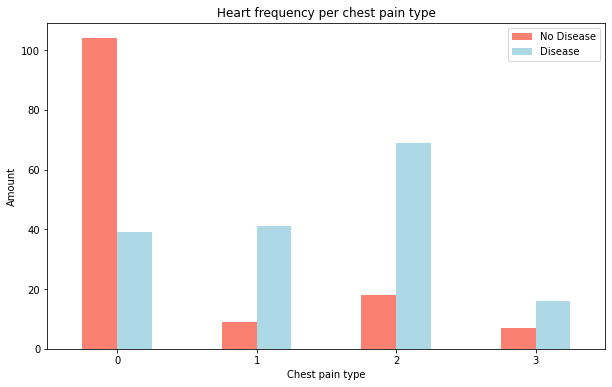

In [42]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

plt.title("Heart frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [43]:
# Make a correlation matrix
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


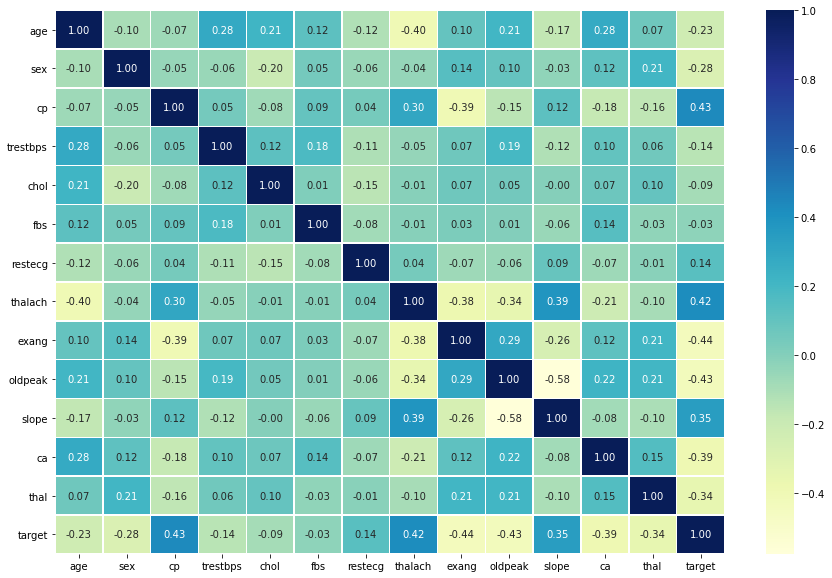

In [44]:
#Lets make our correlation matrix a little prettier
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5, 
              fmt=".2f",
              cmap="YlGnBu");

## Modeling

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
#Split data into X and y
X=df.drop("target", axis=1)
y=df.target

In [50]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)


In [52]:
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

Now are have our data split into training and test sets, its time to build our machine learning model. We will train it (find the patterns) on the training sets and test it (use the patterns) on the test set.  We will try 3 machine learning models
1. Logistic Regression
2. K-Nearest Neigbours Classifiers
3. Random Forest Classifiers

In [53]:
# Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluates given machine learnining models. 
    
    Args:
    Models: A dict of different sklearn machine learning models 
    X_train: training data(no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    
    """
    #Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores={}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #evaluate the model and append the scores to model_Scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [54]:
model_scores=fit_and_score(models=models, 
                           X_train=X_train,
                          X_test=X_test,
                          y_train=y_train, 
                          y_test=y_test)

model_scores

C:\Users\Asabe.Dawudu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [56]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


<AxesSubplot:>

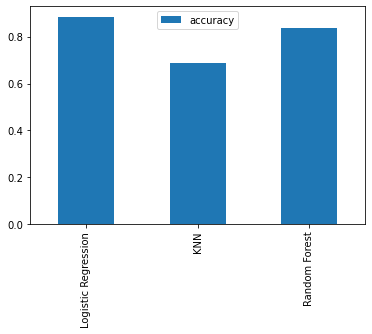

In [63]:

model_compare.T.plot(kind="bar")

Now we have a baseline model, lets tune our model to improve our metrics

Lets look at the following
- Hyperparameter tunning
- Feature Importance
- Confusion matrix
- Cross validation
- Precision, recall, F1-score
- Classification report
- ROC Curve and Area under the curve (AUC)

## Hyperparameters Tuning by hand

In [66]:
#Lets tune KNN

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbores 
neighbors=range(1, 21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop though different n_neigbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #update the test scores list.
    test_scores.append(knn.score(X_test, y_test))

In [67]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


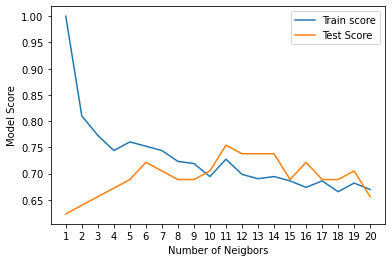

In [71]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neigbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%" )

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
- LogisticRegression ()
- RandomForestClassifier()

....using RandomizedSearchCV

In [74]:
# Create a hyperparameter  grid for logistic regression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10, 1000, 50),
        "max_depth":[None, 3,5,10],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,20)}

Now we have a hyparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [75]:
# Tune Logistic Regression

np.random.seed(42)

#setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20, 
                             verbose=True)
#fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [77]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we have tuned our Logistic Regression, lets do the same for Random Forest Classifier

In [79]:
#setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20, 
                            verbose=True)

#fit random hyperparameter search model for RandomForeestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [80]:
#Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [81]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so fat, we will try and improve the model using GridSearchCV

In [82]:
#Different hyperparameters for our LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Setup grid hyperparameter search for logistic regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#Fit grid hyperparamter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [83]:
#Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [84]:
#Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyound accuracy

More specifically, we want
- ROC and AUC Curve
- Confusion matrix
- Classification report
- Precision, recall and f1-score

And cross validate when possible

To make comparisons and evaluate our trained model, first we need to nmake predicitons

In [86]:
#Make predictions with tuned model
y_preds= gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
y_test #truth labels

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

***ROC Curve***

Used to compare the true positve rates to the false positive rates

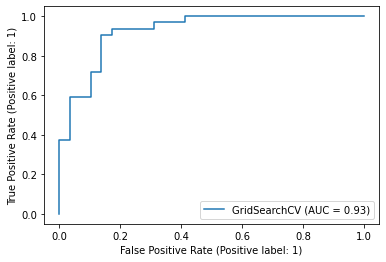

In [88]:
# Plot ROC Curve and calculate the AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [90]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


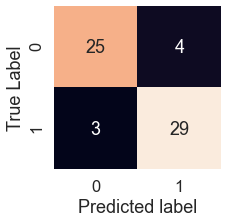

In [93]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    
    Plot a confusion matrix using Seaborn heatmap()
    """
    
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds)

Now we have a RUC curve, a AUC metrix and a confusion matrix. Lets get a classification report and cross validated precision, recall and f1 score

In [94]:
print(classification_report(y_test, y_preds)) #this is done on one set of training data

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We are going to calculate accuracy precision, recall and f1-score of our model using cross-validation using `cross_val_score`.

In [95]:
# Chevk best hyperparemeters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [96]:
#create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [101]:
#Cross validated accuracy
cv_acc=cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [103]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [106]:
#Cross validated precision
cv_precision=cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [107]:
#Cross validated recall
cv_recall=cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [109]:
#Cross validated f1 score
cv_f1=cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

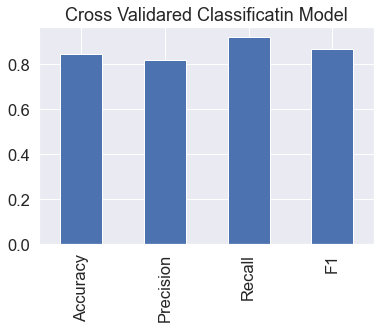

In [112]:
# Visualize cross-validated metrics
cv_metrics=pd.DataFrame({'Accuracy':cv_acc,
                        "Precision": cv_precision,
                        "Recall": cv_recall,
                        "F1":cv_f1},
                       index=[0])

cv_metrics.T.plot.bar(title="Cross Validared Classificatin Model",
                     legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way is to find feature importance is to search for "(Model name) feature importance"

Lets find the feature importance for our LogisticRegression model

In [117]:
#fit an instance of LogisticRegression

clf=LogisticRegression(C= 0.20433597178569418,
                      solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [118]:
#Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [121]:
#Make coef to features to columns
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

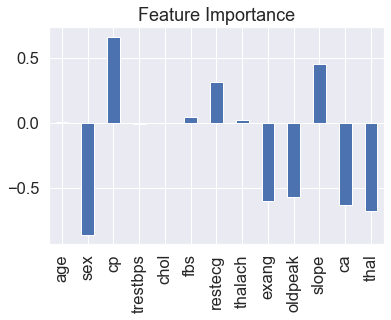

In [122]:
#Visualize Feature Importance
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [123]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [124]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you havent hit your evaluation metric goal yet;
- Could you collect more data?
- Could you try a better model? Like CatBoost or XGBoost
- Could we improve the current models (beyond what we have done so far)
- if your model is good enough (you have hit your evaluation metrics, how would you export it and share it with others?)